# Irish population age dynamics analysis

In [12]:
# Importing all libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
# Load the CSV file
file_path = "C:\\Users\\franc\\OneDrive\\Desktop\\Irish_age_data_2020-2024.csv"
df = pd.read_csv(file_path)

In [14]:
# Give a first look to the data
print(df.head())

                           STATISTIC Label  Year      Age Group     Sex  \
0  Population Estimates (Persons in April)  2020   0 - 14 years    Male   
1  Population Estimates (Persons in April)  2020   0 - 14 years  Female   
2  Population Estimates (Persons in April)  2020  10 - 14 years    Male   
3  Population Estimates (Persons in April)  2020  10 - 14 years  Female   
4  Population Estimates (Persons in April)  2020  15 - 19 years    Male   

       UNIT  VALUE  
0  Thousand  519.9  
1  Thousand  493.7  
2  Thousand  181.6  
3  Thousand  173.2  
4  Thousand  166.4  


In [15]:
# Checking columns in the dataset
print(df.columns)

Index(['STATISTIC Label', 'Year', 'Age Group', 'Sex', 'UNIT', 'VALUE'], dtype='object')


In [16]:
# Checking the types of data we have in the dataset
print(df.dtypes)

STATISTIC Label     object
Year                 int64
Age Group           object
Sex                 object
UNIT                object
VALUE              float64
dtype: object


### Analysis of the age group distribution

The goal of this analysis is to explore how the population is distributed across age groups over time. By visualizing these distributions, I aim to identify overall patterns and changes in the demographic structure, while also providing a clear view of differences between males and females. This step serves as a starting point for understanding the broader demographic trends in Ireland.

In [19]:
# calculation of total population by age group and sex
age_group = df["Age Group"].unique()
male_values = df[df["Sex"] == "Male"].groupby("Age Group")["VALUE"].sum()
female_values = df[df["Sex"] == "Female"].groupby("Age Group")["VALUE"].sum()
print(male_values, female_values)

Age Group
0 - 14 years         2587.1
10 - 14 years         948.0
15 - 19 years         871.0
20 - 24 years         801.5
25 - 29 years         760.6
30 - 34 years         813.1
35 - 39 years         922.4
40 - 44 years        1008.9
45 - 49 years         931.6
50 - 54 years         852.9
55 - 59 years         763.5
60 - 64 years         682.5
65 - 69 years         590.5
70 - 74 years         498.2
75 - 79 years         369.3
80 - 84 years         220.9
85 years and over     156.7
Name: VALUE, dtype: float64 Age Group
0 - 14 years         2470.4
10 - 14 years         906.8
15 - 19 years         831.5
20 - 24 years         772.3
25 - 29 years         758.4
30 - 34 years         861.6
35 - 39 years        1003.6
40 - 44 years        1066.5
45 - 49 years         951.6
50 - 54 years         858.8
55 - 59 years         782.1
60 - 64 years         703.9
65 - 69 years         609.1
70 - 74 years         520.4
75 - 79 years         402.6
80 - 84 years         267.6
85 years and over     259.1


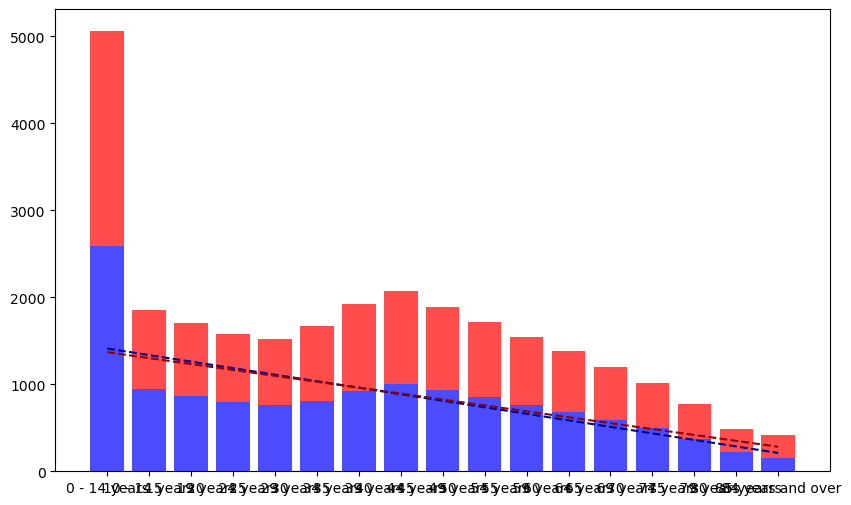

In [ ]:
# Let's create a stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_group, male_values, label="Male", color="blue", alpha=0.7)
plt.bar(age_group, female_values, bottom=male_values, label="Female", color="red", alpha=0.7)

# Let's create some trend lines per gender
male_trend = np.poly1d(np.polyfit(range(len(age_group)), male_values, 1))(range(len(age_group)))
female_trend = np.poly1d(np.polyfit(range(len(age_group)), female_values, 1))(range(len(age_group)))

plt.plot(age_group, male_trend, color="darkblue", linestyle="--", label="Male Trend")
plt.plot(age_group, female_trend, color="darkred", linestyle="--", label="Female Trend")

# 
